In [1]:
import pandas as pd
from river import datasets
from river.naive_bayes import BernoulliNB
from river.metrics import Accuracy
from river.preprocessing import OneHotEncoder

In [2]:
# Load the CSV dataset using pandas
data = pd.read_csv('Customer_Behaviour.csv')

In [3]:
# Separate features and target variable
X = data.drop('Purchased', axis=1)
y = data['Purchased']

# Initialize the Naive Bayes classifier
model = BernoulliNB()


In [4]:
# Create an accuracy metric
metric = Accuracy()

# Preprocess the dataset using OneHotEncoder
preprocessor = OneHotEncoder()

# Train and evaluate the model
for xi, yi in zip(X.to_dict(orient='records'), y):
    xi_encoded = preprocessor.learn_one(xi).transform_one(xi)
    model.learn_one(xi_encoded, yi)
    y_pred = model.predict_one(xi_encoded)
    metric.update(yi, y_pred)


In [5]:

# Get the accuracy
accuracy = metric.get()
print("Accuracy:", accuracy)

Accuracy: 0.8225


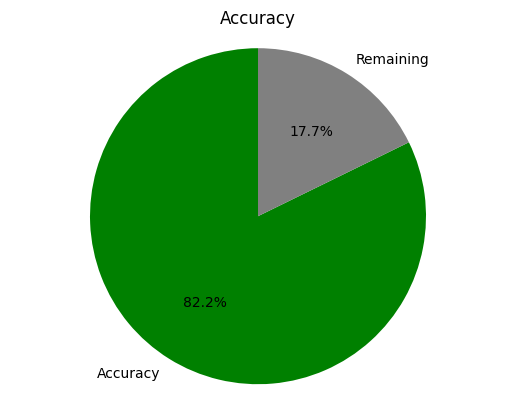

In [6]:
import matplotlib.pyplot as plt

# Accuracy value
accuracy = 82.25

# Create a list with accuracy and remaining percentage
accuracies = [accuracy, 100 - accuracy]

# Labels for each category
labels = ['Accuracy', 'Remaining']

# Colors for each category
colors = ['green', 'gray']

# Create the pie chart
plt.pie(accuracies, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Accuracy')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()


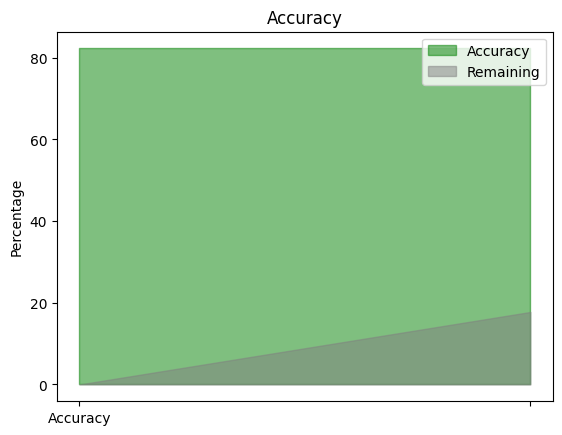

In [7]:
import matplotlib.pyplot as plt

# Accuracy value
accuracy = 82.25

# Calculate remaining percentage
remaining = 100 - accuracy

# Create x-axis values
x = [0, 1]

# Create y-axis values
y1 = [accuracy, accuracy]
y2 = [0, remaining]

# Create the area chart
plt.fill_between(x, y1, alpha=0.5, color='green', label='Accuracy')
plt.fill_between(x, y2, alpha=0.5, color='gray', label='Remaining')

# Set x-axis labels
plt.xticks(x, ['Accuracy', ''])

# Set y-axis label
plt.ylabel('Percentage')

# Add a title
plt.title('Accuracy')

# Display the legend
plt.legend()

# Display the area chart
plt.show()
